## 🛑 Détection des Spam

🔎 **Objectif :** Construire un modèle capable de détecter les spam des courriels. <br/>

🏅 Bonus: Topic modeling

📧 Import Librairies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

📧 Import Dataset

In [2]:
df = pd.read_csv('C:/Users/zaome/Documents/Arthuro/Projet_NLP/Spam Email raw text for NLP.csv')
df

,CATEGORY,MESSAGE,FILE_NAME
0,1,"Dear Homeowner,\n\n \n\nInterest Rates are at ...",00249.5f45607c1bffe89f60ba1ec9f878039a
1,1,ATTENTION: This is a MUST for ALL Computer Use...,00373.ebe8670ac56b04125c25100a36ab0510
2,1,This is a multi-part message in MIME format.\n...,00214.1367039e50dc6b7adb0f2aa8aba83216
3,1,IMPORTANT INFORMATION:\n\n\n\nThe new domain n...,00210.050ffd105bd4e006771ee63cabc59978
4,1,This is the bottom line. If you can GIVE AWAY...,00033.9babb58d9298daa2963d4f514193d7d6
...,...,...,...
5791,0,"I'm one of the 30,000 but it's not working ver...",00609.dd49926ce94a1ea328cce9b62825bc97
5792,0,Damien Morton quoted:\n\n>W3C approves HTML 4 ...,00957.e0b56b117f3ec5f85e432a9d2a47801f
5793,0,"On Mon, 2002-07-22 at 06:50, che wrote:\n\n\n\...",01127.841233b48eceb74a825417d8d918abf8
5794,0,"Once upon a time, Manfred wrote :\n\n\n\n> I w...",01178.5c977dff972cd6eef64d4173b90307f0


### 🛑 Exploration des données

📧 Data shape

In [3]:
df.shape

(5796, 3)

📧 Data info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5796 entries, 0 to 5795
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   CATEGORY   5796 non-null   int64 
 1   MESSAGE    5796 non-null   object
 2   FILE_NAME  5796 non-null   object
dtypes: int64(1), object(2)
memory usage: 136.0+ KB


📧 Data describe

In [5]:
df.describe()

,CATEGORY
count,5796.000000
mean,0.327122
std,0.469203
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


📧 Types de valeurs

In [6]:
df_dtype = df.dtypes
df_dtype.value_counts()

object    2
int64     1
dtype: int64

📧 Valeurs manquantes

In [7]:
df.isnull().sum().sort_values()

CATEGORY     0
MESSAGE      0
FILE_NAME    0
dtype: int64

📧 Répartitions des Nan

In [8]:
df_nan = pd.DataFrame({'Nan':df.isna().sum()})
df_nan['%nan'] = df_nan['Nan']/df.shape[0]*100
round(df_nan,2).sort_values(by='%nan' , ascending=False)

,Nan,%nan
CATEGORY,0,0.0
MESSAGE,0,0.0
FILE_NAME,0,0.0


📧 Duplicates

In [9]:
df.duplicated().sum()

0

📧 Analyse CATEGORY

In [10]:
df['CATEGORY'].value_counts()

0    3900
1    1896
Name: CATEGORY, dtype: int64

### 🛑 Cleanning Data

📧 Import Librairies

In [11]:
pip install --user -U nltk

Note: you may need to restart the kernel to use updated packages.


In [12]:
import re
import nltk
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\zaome\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


📧 Nettoyage des données

In [13]:
def standardize_text(df, content_field):
    df[content_field] = df[content_field].str.replace(r"http\S+", "")
    df[content_field] = df[content_field].str.replace(r"http", "")
    df[content_field] = df[content_field].str.replace(r"@\S+", "")
    df[content_field] = df[content_field].str.replace(r"\n", "")
    df[content_field] = df[content_field].str.replace(r"[^A-Za-z0-9(),!?@\'\`\"\_\n]", " ")
    df[content_field] = df[content_field].str.replace(r"@", "at")
    df[content_field] = df[content_field].str.lower()
    return df

📧 Affichage

In [14]:
standardize_text(df,"MESSAGE")

,CATEGORY,MESSAGE,FILE_NAME
0,1,"dear homeowner, interest rates are at their lo...",00249.5f45607c1bffe89f60ba1ec9f878039a
1,1,attention this is a must for all computer use...,00373.ebe8670ac56b04125c25100a36ab0510
2,1,this is a multi part message in mime format ...,00214.1367039e50dc6b7adb0f2aa8aba83216
3,1,important information the new domain names are...,00210.050ffd105bd4e006771ee63cabc59978
4,1,this is the bottom line if you can give away...,00033.9babb58d9298daa2963d4f514193d7d6
...,...,...,...
5791,0,"i'm one of the 30,000 but it's not working ver...",00609.dd49926ce94a1ea328cce9b62825bc97
5792,0,damien morton quoted w3c approves html 4 'emo...,00957.e0b56b117f3ec5f85e432a9d2a47801f
5793,0,"on mon, 2002 07 22 at 06 50, che wrote thats...",01127.841233b48eceb74a825417d8d918abf8
5794,0,"once upon a time, manfred wrote i would lik...",01178.5c977dff972cd6eef64d4173b90307f0


📧 Corpus

In [15]:
lemmatizer = WordNetLemmatizer()
corpus = []

for i in range(0, len(df)):
    message = re.sub('[^a-zA-Z]', ' ', df['MESSAGE'][i])
    message = message.split()
    message =[word for word in message if not word in set(stopwords.words('english'))]
    message = [lemmatizer.lemmatize(word) for word in message]
    message = ' '.join(message)
    corpus.append(message)

In [16]:
#corpus

In [17]:
len(corpus)

5796

### 🛑 Visualisations

📧 Répartition de la category

C:\Users\zaome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


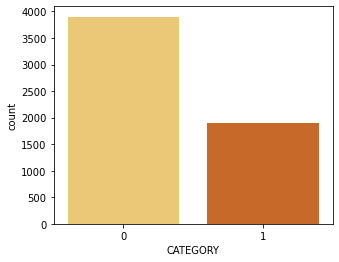

In [70]:
fig, axes = plt.subplots(figsize=(5,4))
sns.countplot(df["CATEGORY"], palette='YlOrBr')
plt.show()

📧 Pie chart 

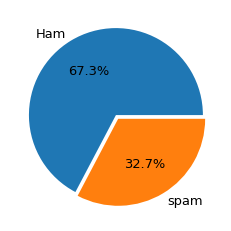

In [19]:
# % de spam 
plt.figure(figsize=(5,4))
plt.pie(df['CATEGORY'].value_counts(), labels=['Ham','spam'], textprops={'fontsize':13},autopct='%1.1f%%', explode=[0,0.05])
plt.show()

📧 Nuage de mots

In [20]:
from wordcloud import WordCloud
text = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [21]:
spam_text = text.generate(df[df['CATEGORY'] == 1]['MESSAGE'].str.cat(sep=" "))

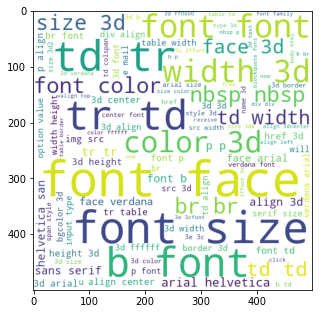

In [22]:
plt.figure(figsize=(5,6))
plt.imshow(spam_text)

In [23]:
ham_text = text.generate(df[df['CATEGORY'] == 0]['MESSAGE'].str.cat(sep=" "))

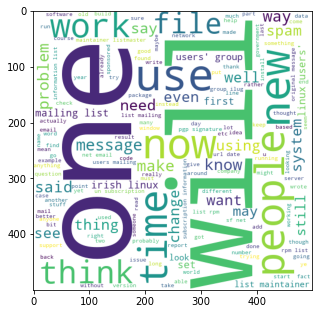

In [24]:
plt.figure(figsize=(5,6))
plt.imshow(ham_text)

📧 Barplot

In [27]:
from collections import Counter

In [28]:
spam_corpus = []
for msg in df[df['CATEGORY'] == 1]['MESSAGE'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

C:\Users\zaome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


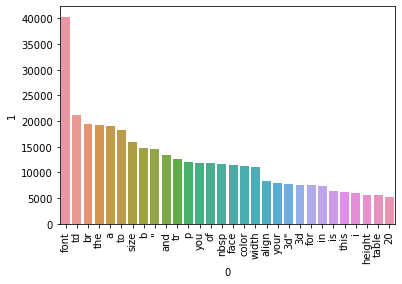

In [29]:
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [30]:
ham_corpus = []
for msg in df[df['CATEGORY'] == 0]['MESSAGE'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

C:\Users\zaome\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


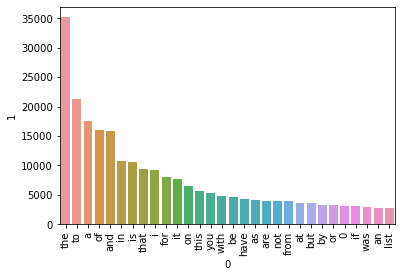

In [31]:
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

### 🛑 Preprocessing

📧 Import Librairies

In [32]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

📧 Fonction get_sequences

In [33]:
def get_sequences(texts, tokenizer, train=True, max_seq_length=None):
    sequences = tokenizer.texts_to_sequences(texts)
    
    if train == True:
        max_seq_length = np.max(list(map(lambda x: len(x), sequences)))
    
    sequences = tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen=max_seq_length, padding='post')
    
    return sequences

📧 Drop colonne

In [34]:
df = df.drop('FILE_NAME', axis=1)
df

,CATEGORY,MESSAGE
0,1,"dear homeowner, interest rates are at their lo..."
1,1,attention this is a must for all computer use...
2,1,this is a multi part message in mime format ...
3,1,important information the new domain names are...
4,1,this is the bottom line if you can give away...
...,...,...
5791,0,"i'm one of the 30,000 but it's not working ver..."
5792,0,damien morton quoted w3c approves html 4 'emo...
5793,0,"on mon, 2002 07 22 at 06 50, che wrote thats..."
5794,0,"once upon a time, manfred wrote i would lik..."


📧 Plit data

In [35]:
y = df['CATEGORY']
X = df['MESSAGE']

📧 Train-test split

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, shuffle=True, random_state=0)

📧 tokenisation

In [37]:
# Create tokenizer
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words = 30000)
    
# Fit the tokenizer
tokenizer.fit_on_texts(X_train)

# Convert texts to sequences
X_train = get_sequences(X_train, tokenizer, train=True)
X_test = get_sequences(X_test, tokenizer, train=False, max_seq_length = X_train.shape[1])

### 🛑 Training

In [38]:
X_train

array([[ 271,  212,   93, ...,    0,    0,    0],
       [ 140, 1841,    1, ...,    0,    0,    0],
       [ 645,    4,  703, ...,    0,    0,    0],
       ...,
       [1624, 3398, 2930, ...,    0,    0,    0],
       [ 271,  212,   93, ...,    0,    0,    0],
       [ 271,  212,   93, ...,    0,    0,    0]])

In [39]:
y_train

2676    0
2470    0
330     1
2351    0
3066    0
       ..
4931    0
3264    0
1653    1
2607    0
2732    0
Name: CATEGORY, Length: 2898, dtype: int64

In [40]:
y_train.value_counts()

0    1961
1     937
Name: CATEGORY, dtype: int64

In [41]:
X_train.shape

(2898, 12901)

In [42]:
y_train.shape

(2898,)

### 🛑 Modèles

📧 Import Librairies

In [49]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation
from tensorflow.keras.models import Sequential

📧 Input_shape

In [50]:
input_shape = X_train.shape[1:]
input_shape

(12901,)

📧 Couches modèle

In [60]:
model = Sequential()

#Convolution
model.add(Embedding(input_dim = 30000, output_dim=64, 
                    input_shape=input_shape))
#Flatten
model.add(Flatten())
#Couches denses
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

📧 Modèle compile

In [61]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', 'AUC']
)

📧 Modèle summary

In [62]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 12901, 64)         1920000   
                                                                 
 flatten_2 (Flatten)         (None, 825664)            0         
                                                                 
 dropout_2 (Dropout)         (None, 825664)            0         
                                                                 
 dense_4 (Dense)             (None, 1)                 825665    
                                                                 
Total params: 2,745,665
Trainable params: 2,745,665
Non-trainable params: 0
_________________________________________________________________


📧 Modèle fit

In [63]:
history = model.fit(X_train, y_train,
                    validation_split=0.2,
                    batch_size=32,
                    epochs=20
)

Epoch 1/20
73/73 [==============================] - 21s 290ms/step - loss: 0.6627 - accuracy: 0.7640 - auc: 0.7713 - val_loss: 0.1914 - val_accuracy: 0.9310 - val_auc: 0.9971
Epoch 2/20
73/73 [==============================] - 24s 335ms/step - loss: 0.1005 - accuracy: 0.9702 - auc: 0.9985 - val_loss: 0.0619 - val_accuracy: 0.9810 - val_auc: 0.9995
Epoch 3/20
73/73 [==============================] - 26s 353ms/step - loss: 0.0304 - accuracy: 0.9935 - auc: 0.9999 - val_loss: 0.0448 - val_accuracy: 0.9793 - val_auc: 0.9997
Epoch 4/20
73/73 [==============================] - 27s 367ms/step - loss: 0.0149 - accuracy: 0.9974 - auc: 1.0000 - val_loss: 0.0321 - val_accuracy: 0.9879 - val_auc: 0.9998
Epoch 5/20
73/73 [==============================] - 25s 346ms/step - loss: 0.0092 - accuracy: 0.9991 - auc: 1.0000 - val_loss: 0.0287 - val_accuracy: 0.9879 - val_auc: 0.9998
Epoch 6/20
73/73 [==============================] - 25s 338ms/step - loss: 0.0063 - accuracy: 0.9996 - auc: 1.0000 - val_loss

### 🛑 Learning Curve

📧 Learning Curve Loss

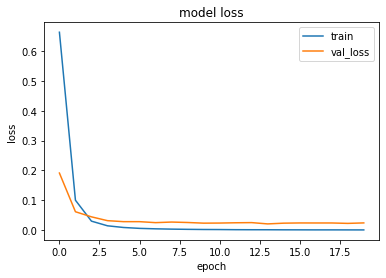

In [64]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val_loss'])

plt.show()

📧 Learning Curve Accuracy

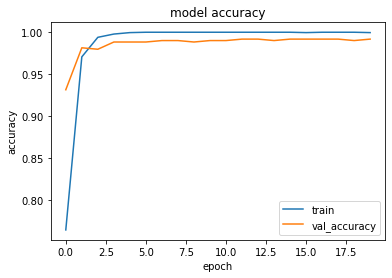

In [65]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val_accuracy'])

plt.show()

📧 Learning Curve AUC

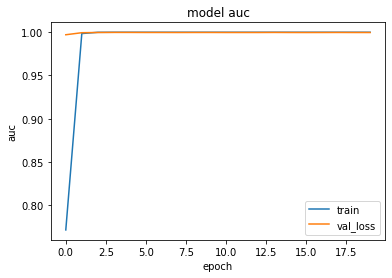

In [66]:
plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])

plt.title('model auc')
plt.ylabel('auc')
plt.xlabel('epoch')
plt.legend(['train', 'val_loss'])

plt.show()

📧 Scores modèle

In [67]:
results = model.evaluate(X_test, y_test, verbose=0)

print("Test Loss: {:.4f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))
print("Test AUC: {:.4f}".format(results[2]))

Test Loss: 0.0423
Test Accuracy: 99.03%
Test AUC: 0.9964


### 🛑 Pickel

In [68]:
import pickle

with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)